# Domácí úkol


# Sparse matice (sousednosti)
Vyrobte sparse matici o rozměrech $n^2\times n^2$. Tato matice reprezentuje pravidelnou čtvercovou síť o velikosti $n \times n$. Každá buňka této čtvercové sítě odpovídá jednomu řádku/sloupci matice, přičemž pořadí buněk čtvrtcové sítě berte po řádcích (viz obrázek níže). 

Hodnoty v matici budou řízeny jedním parametrem $\varepsilon$, pro jednoduchost si místo něj představte $0.1$.
Nenulové hodnoty v matici jsou zadány sousedností buněk a to následovně:
- hodnoty na diagonále (tedy sousednost prvku se sebou samým) jsou $1 + k \cdot \varepsilon$ (kde $k$ určuje počet sousedních buněk = 4 uvnitř, 3 na hranách, 2 v rozích)
- mimodiagonální prvky mají hodnotu $-\varepsilon$, právě tehdy pokud index řádku a index sloupce mimodiagonálního prvku odpovídá sousedním buňkám ve čtvercové síti viz obrázek.

**Ukázka jak přechází mřížka do matice pro $n=4$ a $\varepsilon = 0.1$ na následujícím obrázku:**
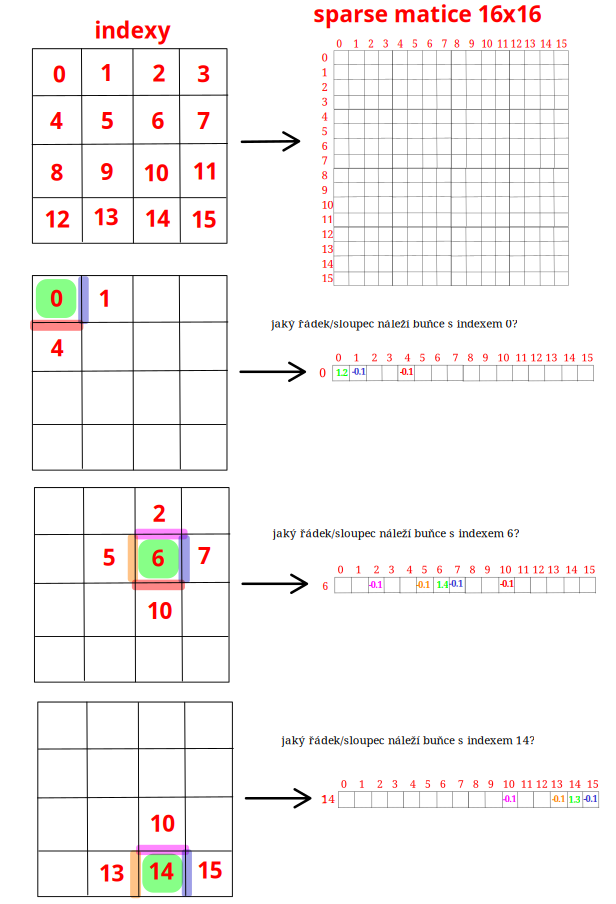

Vznikne manice s následujícími vlastnostmi:
- velikost $n^2 \times n^2$
- $\varepsilon$ je parametr, který můžete nastavit, například $\varepsilon = 0.1$
- matice je symetrická, tj. $A = A^T$
- každý řádek/sloupec má maximálně 5 nenulových prvků
    - 5, pokud se jedná o buňku unvitř sítě
    - 4, pokud se jedná o buňku na okraji sítě
    - 3, pokud se jedná o buňku v rohu sítě
- výsledná matice je 5-ti diagonální (hlavní diagonála, dvě vedleší těsně pod a nad hlavní diagonálou, dvě vedleší diagonály ve vzdálenosti $\pm n$ od hlavní diagonály)

Pro $n=3$ a $\varepsilon = 0.1$ by měla matice (v plné formě) měla vypadat následovně:
```python
[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]
 ```

## Úkol 1.
**Sestavte matici pomocí formátu `LIL` a vyplňte hodnoty pomocí cyklu přes všechny buňky čtvercové sítě.** 
 - vypište a vykreslete jako obrázek pro $n=3$ a $\varepsilon = 0.1$.
 - vykreslete jako obrázek pro $n=100$ a $\varepsilon = 0.2$. 

In [1]:
import scipy.sparse as sparse
import numpy as np

def A_with_loop(n=3, epsilon=1e-1):
    A = sparse.lil_matrix((n*n, n*n))
    for i in range(n):
        for j in range(n):
            # fill matrix A - diagonal and non-diagonal elements
            diag_element = 1
            if i - 1 >= 0:
                A[i * n + j, (i - 1) * n + j] = -epsilon
                diag_element += epsilon
            if i + 1 < n:
                A[i * n + j, (i + 1) * n + j] = -epsilon
                diag_element += epsilon
            if j - 1 >= 0:
                A[i * n + j, i * n + j - 1] = -epsilon
                diag_element += epsilon
            if j + 1 < n:
                A[i * n + j, i * n + j + 1] = -epsilon
                diag_element += epsilon
            A[i * n + j, i * n + j] = diag_element
    return A

A = A_with_loop(n=3)
print(A.todense())

[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]


## Úkol 2. 

Použijte matici $A$ z předchozích úkolů. Vytvořte (použijte níže vytvořený) vektor $b$ odpovídající čtvercové síti s nulami všude kromě malého čtverce uprostřed ($n/6$ okolo středu) s hodnotou 1. 
- Vykreslete řešení $x$ systému $A \cdot x = b$ jako obrázek čtvercové sítě
- Spočtěte a vizualizujte 3 vlastní vektory matice $A$ (vlastní vektory odpovídající největším vlastním hodnotám) - opět jako obrázek čtvercové sítě

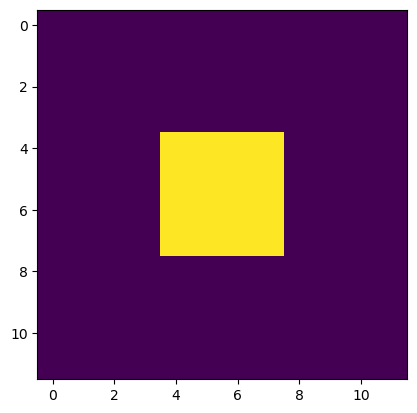

In [2]:
import matplotlib.pyplot as plt

n = 12
epsilon = 2e-1
A = A_with_loop(n, epsilon)

b = np.zeros((n, n))
b[n//2 - n//6:n//2 + n//6,n//2 - n//6:n//2 + n//6] = 1
b = b.flatten()
plt.imshow(b.reshape((n, n)))

/tmp/ipykernel_3659315/3911942028.py:4: SparseEfficiencyWarning: spsolve requires A be CSC or CSR matrix format
  x = sp.sparse.linalg.spsolve(A, b)


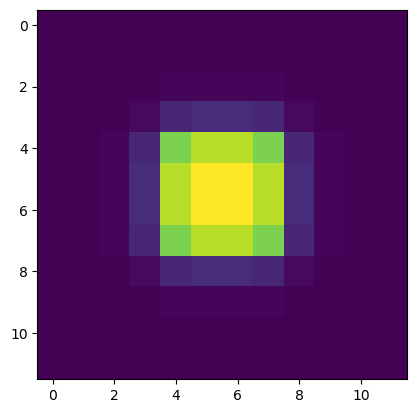

In [3]:
import scipy as sp

# TODO - vyřešte lineární rovnici A x = b a vykreselete výsledek
x = sp.sparse.linalg.spsolve(A, b)
plt.imshow(x.reshape((n, n)))

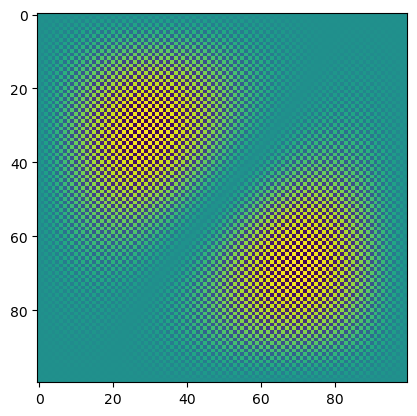

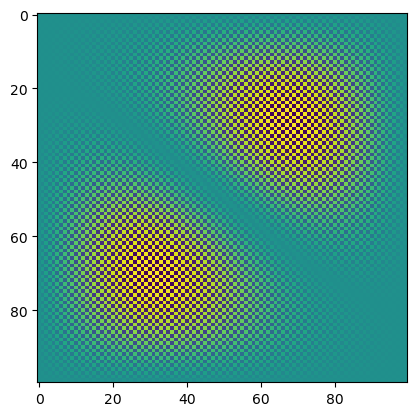

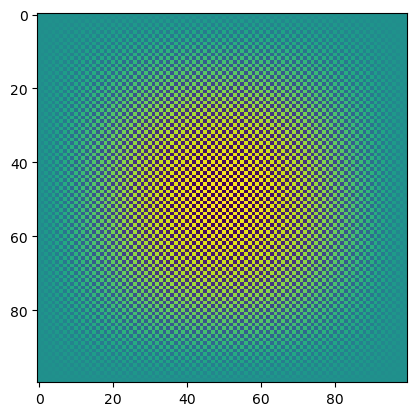

In [15]:
# TODO - spočtěte a vykreslete vlastní vektory matice A
n = 100
A = A_with_loop(n, 0.1)
D, U = sp.sparse.linalg.eigsh(A, k=3)

for eigvec in U.T:
    plt.imshow(eigvec.reshape((n, n)))
    plt.show()

# Bonusový úkol

**Sestavte matici $A$ z úkolu 1. bez použití cyklů.**
- porovnejte výsledky z úkolu 1 a 2 pro různé hodnoty $n$ a $\varepsilon$.

Sestavte nejprve vektory indexů řádků, sloupců a hodnot pro všechny nenulové prvky matice. Poté sestavte sparse matici ve formátu CSR najednou z těchto tří polí. 

Hint, jak na to: 
- Sestavte tři pole: `row`, `col` a `data`, které obsahují řádky, sloupce a hodnoty nenulových prvků matice 
    - separátně sestavte příspěvky které vzniknou konektivitou na vnitřních horizontálních hranách a na vnitřních vertikálních hranách.
        - při procházení všech vnitřních horizontálních hran si rozmyslete jaké jsou vždy indexy nad a pod hranou (toto jsou souřadnice řádků a sloupců nenulových prvků)
        - totéž pro vnitřní vertikální hrany zde se může hodit `np.arange(n * n).reshape((n, n)).T.flatten()` což vytvoří vektor s přeházenými indexy (tedy indexy buněk uspořádané po sloupcích)
    - zvlášť sestavte příspevky pro mimodiagonální prvky a diagonální prvky.
        - u diagonálních prvků, nejprve vyrobte vektor hodnot $1+ 4\cdot \varepsilon$ a pak pro každou hranu odečtěte $\varepsilon$.
- Tyto pole vytvořte vektorizovaně - bez cyklů

In [16]:
# create matrix A using vectorized operations, creating indices for rows and columns and data
# use sparse.csr_matrix((data, (i, j)))
import numpy as np
from scipy.sparse import csr_matrix

n = 3
epsilon = 0.1

def A_efficiently(n, epsilon=0.01):
    ## --- Mimodiagonální prvky
    # Vnitřní horizontální hrany
    horizontal_up_idx = np.arange(n * (n-1))  # vytvořte indexy buněk nad hranou
    horizontal_low_idx = np.arange(n, n * n)  # vytvořte indexy buněk pod hranou
    row_horizontal = np.hstack([horizontal_up_idx, horizontal_low_idx])  # vytvořte indexy řádků pro vnitřní horizontální hrany
    col_horizontal = np.hstack([horizontal_low_idx, horizontal_up_idx])  # vytvořte indexy sloupců pro vnitřní horizontální hrany
    data_horizontal = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná


    # Vnitřní vertikální hrany
    index_matrix_vertical = np.arange(n * n).reshape((n, n)).T.flatten() # indexy buněk přeházené pro vertikální hranu
    vertical_left_idx = index_matrix_vertical[:n * (n-1)]  # použijte index_matrix_vertical[...] pro vytvoření indexů buněk vlevo od hran
    vertical_right_idx = index_matrix_vertical[n:n * n]  # použijte index_matrix_vertical[...] pro vytvoření indexů buněk vpravo od hran
    row_vertical = np.hstack([vertical_left_idx, vertical_right_idx])  # vytvořte indexy řádků pro vnitřní vertikální hrany
    col_vertical = np.hstack([vertical_right_idx, vertical_left_idx])  # vytvořte indexy sloupců pro vnitřní vertikální hrany
    data_vertical = -epsilon * np.ones(2 * (n * n - n)) # data jsou vždy stejná

    ## --- Diagonála (všechny prvky)
    diagonal_idx = np.arange(n * n)
    row_idx_diag = diagonal_idx
    col_idx_diag = diagonal_idx
    data_diag = (1 + 4 * epsilon) * np.ones(n * n)

    # odečteme epsilon pro každou z hran
    # horní hrana
    data_diag[:n] -= epsilon
    # odečtěte epsilon pro horní hranu
    # dolní hrana
    data_diag[n*(n-1):n * n] -= epsilon
    # odečtěte epsilon pro dolní hranu
    # levá hrana
    data_diag[::n] -= epsilon
    # odečtěte epsilon pro levou hranu
    # pravá hrana
    data_diag[(n-1)::n] -= epsilon
    # odečtěte epsilon pro pravou hranu

    ## --- spojení všech vektorů a sestavení matice
    # spojíme všechny vnitřní hrany a diagonálu
    row = np.hstack((row_idx_diag, row_horizontal, row_vertical))
    col = np.hstack((col_idx_diag, col_horizontal, col_vertical))
    data = np.hstack((data_diag, data_horizontal, data_vertical))

    # vyrobíme matici
    A_efficiently = csr_matrix((data, (row, col)))  # TODO - vytvořte matici v CSR formátu z dat, řádků a sloupců

    return A_efficiently

print(A_efficiently(n, epsilon).todense())

[[ 1.2 -0.1  0.  -0.1  0.   0.   0.   0.   0. ]
 [-0.1  1.3 -0.1  0.  -0.1  0.   0.   0.   0. ]
 [ 0.  -0.1  1.2  0.   0.  -0.1  0.   0.   0. ]
 [-0.1  0.   0.   1.3 -0.1  0.  -0.1  0.   0. ]
 [ 0.  -0.1  0.  -0.1  1.4 -0.1  0.  -0.1  0. ]
 [ 0.   0.  -0.1  0.  -0.1  1.3  0.   0.  -0.1]
 [ 0.   0.   0.  -0.1  0.   0.   1.2 -0.1  0. ]
 [ 0.   0.   0.   0.  -0.1  0.  -0.1  1.3 -0.1]
 [ 0.   0.   0.   0.   0.  -0.1  0.  -0.1  1.2]]


In [17]:
n = 100
epsilon = 1e-2
A = A_with_loop(n, epsilon)
A_eff = A_efficiently(n, epsilon)

print(np.allclose(A.todense(), A_eff.todense()))


True


In [18]:
n = 1000
epsilon = 1e-2
%timeit A_with_loop(n, epsilon)

3.7 s ± 26.4 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


In [19]:
n = 1000
epsilon = 1e-2
%time A_efficiently(n, epsilon)

CPU times: user 64.8 ms, sys: 52.4 ms, total: 117 ms
Wall time: 115 ms


<1000000x1000000 sparse matrix of type '<class 'numpy.float64'>'
	with 4996000 stored elements in Compressed Sparse Row format>

In [9]:
def A_efficiently2(n, epsilon):
    A_row = []
    A_col = []

    def to_ix(i, j):
        return i * n + j
    i = np.arange(n * n) // n
    j = np.arange(n * n) % n
    ij = to_ix(i, j)

    mask_len = n * (n - 1)

    A_val = np.zeros(4 * mask_len + n * n)

    mask = i != 0
    A_row.append(ij[mask])
    A_col.append(to_ix(i - 1, j)[mask])
    assert len(A_row) == len(A_col)

    mask = i != n - 1
    A_row.append(ij[mask])
    A_col.append(to_ix(i + 1, j)[mask])
    assert len(A_row) == len(A_col)

    mask = j != 0
    A_row.append(ij[mask])
    A_col.append(to_ix(i, j - 1)[mask])
    assert len(A_row) == len(A_col)

    mask = j != n - 1
    A_row.append(ij[mask])
    A_col.append(to_ix(i, j + 1)[mask])
    assert len(A_row) == len(A_col)

    A_val[:4 * mask_len] = -epsilon

    A_val[4 * mask_len:] = 1.0 + epsilon * ((i != 0) * 1 + (i != n - 1) * 1 + (j != 0) * 1 + (j != n - 1) * 1)

    A_row.append(ij)
    A_col.append(ij)
    assert len(A_row) == len(A_col)

    return csr_matrix((A_val, (np.concatenate(A_row), np.concatenate(A_col))))

In [10]:
n = 3000
epsilon = 1e-2
%time A_efficiently2(n, epsilon)

CPU times: user 513 ms, sys: 188 ms, total: 701 ms
Wall time: 705 ms


<9000000x9000000 sparse matrix of type '<class 'numpy.float64'>'
	with 44988000 stored elements in Compressed Sparse Row format>